# Understanding college debt
I want to see what types of universities have students in debt.  We will be using the college scorecard API from data.gov.  I am interested in a number of variables, these are admissions rate, tuition, median household income, student size, etc.

It seems that the UC office of president <a href="http://www.ucop.edu/institutional-research-academic-planning/_files/College%20Scorecard%20Brief.pdf">claims that the UC schools are a good deal</a> based on data from the college scorecard.

You should go begin by getting an <a href="https://api.data.gov/signup/">API key for data.gov</a>.  There are many data.gov APIs that you can use this key for and they have fairly relaxed limits on the number of requests.

The documentation for the API can be found here...<br>
https://github.com/RTICWDT/open-data-maker/blob/master/API.md<br>
https://collegescorecard.ed.gov/data/

Let's import some packages.

In [13]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

Here are some variable names that we will be interested in.

In [2]:
varnames = """id
school.name
school.degrees_awarded.predominant
2014.admissions.admission_rate.overall
2014.cost.tuition.in_state
2014.cost.tuition.out_of_state
2014.aid.median_debt.completers.overall
2014.aid.median_debt.noncompleters
2005.student.demographics.median_hh_income
2005.student.demographics.poverty_rate
2014.aid.federal_loan_rate
2014.aid.pell_grant_rate
2014.student.size"""

__Exercise (1)__ I would like to make a complicated query from the API.  An example query from the API is 

<pre>https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3&_fields=school.name,
2014.aid.pell_grant_rate&_sort=2014.student.size:desc&_page=1
&_per_page=100&api_key=YOURKEY
</pre>

Which can be parsed as  
1. the base url: https://api.data.gov/ed/collegescorecard/v1/schools.json, 
2. a filter of school.degrees_awarded.predominant=3, 
3. return the fields school.name,2014.aid.pell_grant_rate, 
4. sort by 2014.student.size in descending order, 
5. return 1 page of 100 entries, 
6. and use your api key

You can find a more complete description: https://github.com/RTICWDT/open-data-maker/blob/master/API.md

Fill in the following def that fits the following docstring, and gives the shown output.
<pre>
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """


query_url(key,fieldnames,'school.degrees_awarded.predominant=3',
  '2014.student.size',2)

https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.predominant=3,4&_fields=id,school.name,school.degrees_awarded.predominant,school.degree_urbanization,2014.admissions.admission_rate.overall,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.aid.federal_loan_rate,2014.aid.pell_grant_rate,2014.student.size&_page=2&_per_page=100&_sort=2014.student.size:desc&api_key=YOURKEYHERE
</pre>

Try to reproduce the above behavior.

In [3]:
fieldnames=['id',
'school.name', 
'school.degrees_awarded.predominant', 
'2014.admissions.admission_rate.overall', 
'2014.cost.tuition.in_state',
'2014.cost.tuition.out_of_state',
'2014.aid.median_debt.completers.overall',
'2014.aid.median_debt.noncompleters',
'2005.student.demographics.median_hh_income',
'2005.student.demographics.poverty_rate',
'2014.aid.federal_loan_rate',
'2014.aid.pell_grant_rate',
'2014.student.size']
sortvar = '2014.student.size:desc'
key = 'yOb2xomDNrvDXmIVjzYI6Cz2arlA5tdqHM9RNBX7'

In [4]:
def query_url(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """
    base_url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'
    response = requests.get(base_url,params={'school.degrees_awarded.predominant': filterstring,
                                             '_fields': ','.join(fieldnames),
                                             '_sort': sortvar, 
                                             '_page': numpages,
                                             '_per_page': 100,
                                             'api_key': key})
    response.raise_for_status()
    return response.url

In [5]:
query_url(key,fieldnames,'3',sortvar,2)

u'https://api.data.gov/ed/collegescorecard/v1/schools.json?_fields=id%2Cschool.name%2Cschool.degrees_awarded.predominant%2C2014.admissions.admission_rate.overall%2C2014.cost.tuition.in_state%2C2014.cost.tuition.out_of_state%2C2014.aid.median_debt.completers.overall%2C2014.aid.median_debt.noncompleters%2C2005.student.demographics.median_hh_income%2C2005.student.demographics.poverty_rate%2C2014.aid.federal_loan_rate%2C2014.aid.pell_grant_rate%2C2014.student.size&_sort=2014.student.size%3Adesc&_per_page=100&school.degrees_awarded.predominant=3&api_key=yOb2xomDNrvDXmIVjzYI6Cz2arlA5tdqHM9RNBX7&_page=2'

__Exercise (2)__ Make the query using Request and load the results into a DataFrame that makes sense.

In [6]:
def query(key,fieldnames,filterstring,sortvar,numpages):
    """
    This takes all of the necessary parameters to form a query 
    to college scorecard
    Input: key (data.gov API key, string), fieldnames (list of variable 
      names), filterstring (string for filtering), sortvar (variable to 
      sort with by descending), numpages (number of pages to return)
    Output: JSON object
    """
    base_url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'
    response = requests.get(base_url,params={'school.degrees_awarded.predominant': filterstring,
                                             '_fields': ','.join(fieldnames),
                                             '_sort': sortvar, 
                                             '_page': numpages,
                                             '_per_page': 100,
                                             'api_key': key})
    response.raise_for_status()
    return response.json()

In [7]:
college = query(key,fieldnames,'3',sortvar,2)
college_df = pd.DataFrame(college['results'])

In [8]:
college_df.set_index('school.name',inplace=True)
college_df.head()

,2005.student.demographics.median_hh_income,2005.student.demographics.poverty_rate,2014.admissions.admission_rate.overall,2014.aid.federal_loan_rate,2014.aid.median_debt.completers.overall,2014.aid.median_debt.noncompleters,2014.aid.pell_grant_rate,2014.cost.tuition.in_state,2014.cost.tuition.out_of_state,2014.student.size,id,school.degrees_awarded.predominant
school.name,,,,,,,,,,,,
Universidad Del Este,21682.0,43.689999,NaN,0.3931,6789.5,3275.0,0.8644,5580,5580,12198,243346,3
University of Massachusetts-Lowell,76546.0,6.540000,0.6201,0.5744,25000.0,10422.0,0.2884,12447,27400,12190,166513,3
CUNY City College,48071.0,21.600000,0.3806,0.2225,11551.0,7000.0,0.5180,6389,13199,12175,190567,3
New Mexico State University-Main Campus,43867.0,17.799999,0.6960,0.4002,18340.0,7624.0,0.4191,5950,19112,12171,188030,3
University of Massachusetts-Boston,68463.0,9.010000,0.7077,0.5523,NaN,NaN,0.3857,11966,28390,12108,166638,3


__Exercise (3)__ Produce scatterplots to demonstrate the associations between student debt (for 'completers') and median household income, pell grant rates, student poverty rate, tuition, and federal loan rate.  Do you have an explanation for the associations that you are seeing?  Are there some surprising associations.

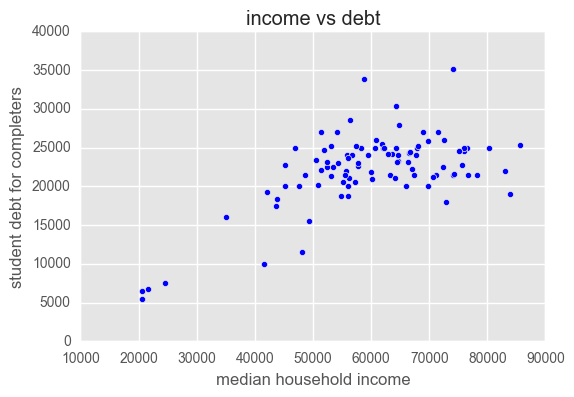

In [40]:
plt.scatter(college_df['2005.student.demographics.median_hh_income'],
            college_df['2014.aid.median_debt.completers.overall'])
plt.xlabel('median household income')
plt.ylabel('student debt for completers')
plt.title('income vs debt')
plt.show()

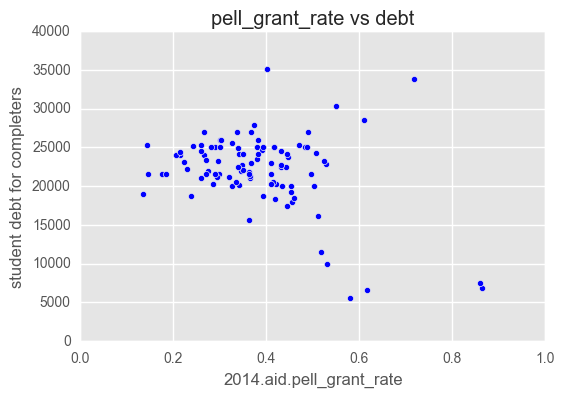

In [41]:
plt.scatter(college_df['2014.aid.pell_grant_rate'],
            college_df['2014.aid.median_debt.completers.overall'])
plt.xlabel('2014.aid.pell_grant_rate')
plt.ylabel('student debt for completers')
plt.title('pell_grant_rate vs debt')
plt.show()

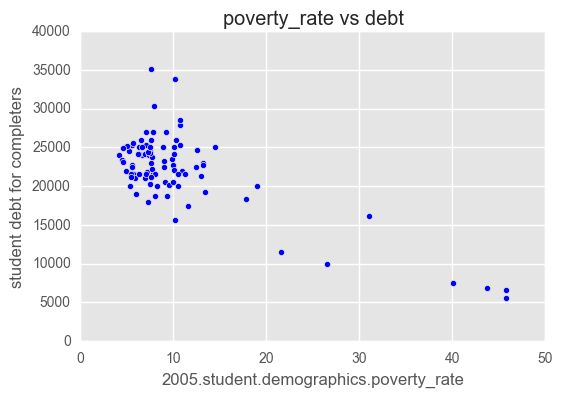

In [42]:
plt.scatter(college_df['2005.student.demographics.poverty_rate'],
            college_df['2014.aid.median_debt.completers.overall'])
plt.xlabel('2005.student.demographics.poverty_rate')
plt.ylabel('student debt for completers')
plt.title('poverty_rate vs debt')
plt.show()

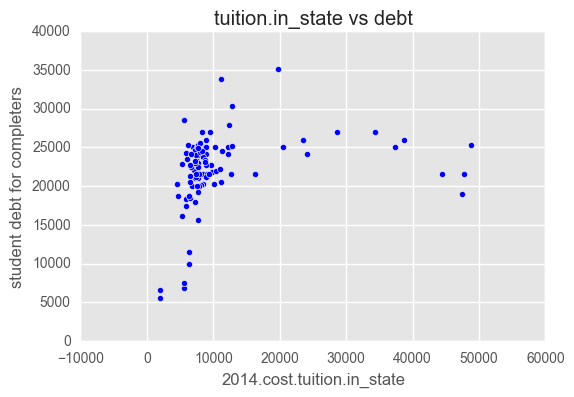

In [43]:
plt.scatter(college_df['2014.cost.tuition.in_state'],
            college_df['2014.aid.median_debt.completers.overall'])
plt.xlabel('2014.cost.tuition.in_state')
plt.ylabel('student debt for completers')
plt.title('tuition.in_state vs debt')
plt.show()

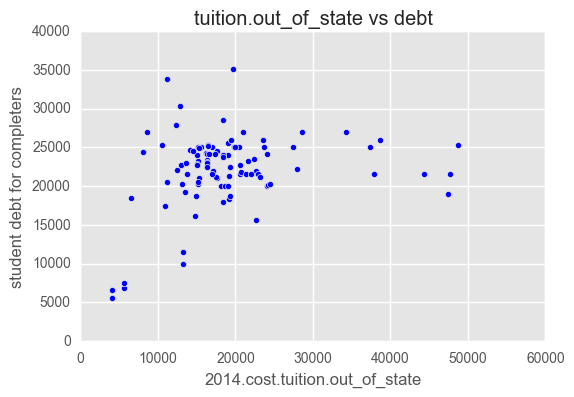

In [44]:
plt.scatter(college_df['2014.cost.tuition.out_of_state'],
            college_df['2014.aid.median_debt.completers.overall'])
plt.xlabel('2014.cost.tuition.out_of_state')
plt.ylabel('student debt for completers')
plt.title('tuition.out_of_state vs debt')
plt.show()

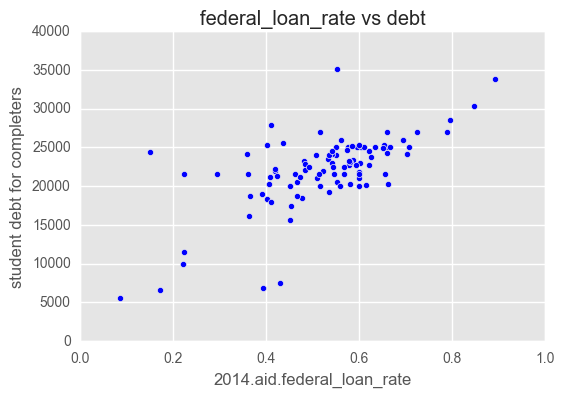

In [45]:
plt.scatter(college_df['2014.aid.federal_loan_rate'],
            college_df['2014.aid.median_debt.completers.overall'])
plt.xlabel('2014.aid.federal_loan_rate')
plt.ylabel('student debt for completers')
plt.title('federal_loan_rate vs debt')
plt.show()


The higher the federal loan rate and the tuition, the higher the debt a student has which is quite straightfoward. Low pell grant rate means the student don't need a lot of aid and it maps to high debt which means the student has already had enough money which is consistent with the low pell grant rate. However, I feel suprised that the high debt comes out with low povery rate high household income which are things that I can't give an explanation. 